# [IAPR][iapr]: Lab 2 ‒  Object description


**Group ID:** 17

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Mahmoud Mohamed Nabegh Ahmed SAID (309264)   
**Author 3 (sciper):** Ben Haj Yahia AHMED (261217)   

**Release date:** 26.03.2021  
**Due date:** 23.04.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try:
1. Fourier Descriptors (15pts). 
    1. Implementation (10 pts).
    2. Showing invariance to rotation, translation and scaling (5 pts).
2. Additional method of your choice (5 pts)


**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point. Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

### 1.1 Data visualization

In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

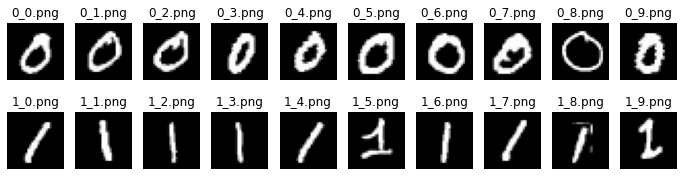

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')


# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors (15 pts)

In [3]:
from skimage.morphology import area_opening, area_closing

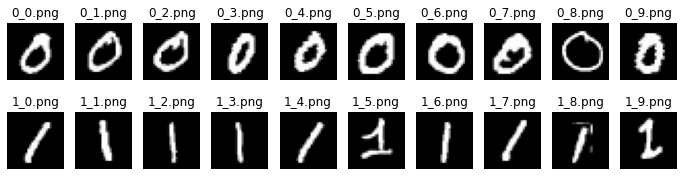

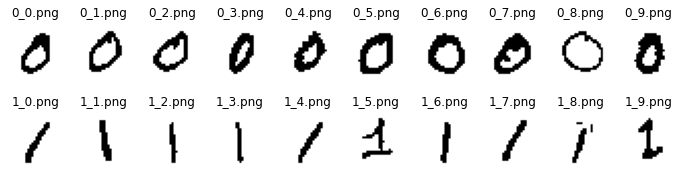

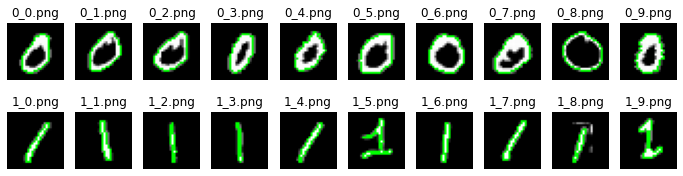

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Plot initial images

fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)



#image binarization
ret,Binary_zeros_im = cv2.threshold(zeros_im,127,255,0)
ret,Binary_ones_im = cv2.threshold(ones_im,127,255,0)

fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], Binary_zeros_im, zeros_names):
    ax.imshow(im, cmap='binary')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], Binary_ones_im, ones_names):
    ax.imshow(im, cmap='binary')
    ax.axis('off')
    ax.set_title(nm)

    
#Find contours
contours_zeros_im = []
contours_ones_im = []
for i in range(len(zeros_im)):
    # Find contours
    contours_zero, hierarchy = cv2.findContours(Binary_zeros_im[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours_one, hierarchy = cv2.findContours(Binary_ones_im[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    contours_zeros_im.append(contours_zero)
    contours_ones_im.append(contours_one)
    

#draw contours

draw_contours_zeros = []
draw_contours_ones = []
for i in range(len(zeros_im)):
    draw_contours_zeros.append(cv2.drawContours(cv2.cvtColor(zeros_im[i], cv2.COLOR_GRAY2BGR), contours_zeros_im[i], 0, (0,255,0), 1))
    draw_contours_ones.append(cv2.drawContours(cv2.cvtColor(ones_im[i], cv2.COLOR_GRAY2BGR), contours_ones_im[i], 0, (0,255,0), 1))


fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], draw_contours_zeros, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], draw_contours_ones, ones_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

As you can see, we applied image binarization and using OpenCV functions, we extracted and drawn the contours.
Below, we will implement the FourierDescriptor method, that takes a contour array ((x,y) coordinates representing the contour) and returns its fourier.

In [5]:
# # Fourier Descriptor
# def fourierDescriptor(contour_array):
#     contour_complex = np.empty(contour_array.shape[0],dtype=complex)
#     contour_complex.real = contour_array[:,0,0]
#     contour_complex.imag = contour_array[:,0,1]
#     fourier_result= np.fft.fft(contour_complex)
#     magnitude = np.array([abs(ffs) for ffs in fourier_result])
#     return magnitude / magnitude[0]


In [6]:
# Fourier Descriptor
def fourierDescriptor(contour_array):
    contour_complex = np.empty(contour_array.shape[0],dtype=complex)
    contour_complex.real = contour_array[:,0,0]
    contour_complex.imag = contour_array[:,0,1]
    fourier_result= np.fft.fft(contour_complex)
    return fourier_result


Now we will show the first 3 descriptors for each image

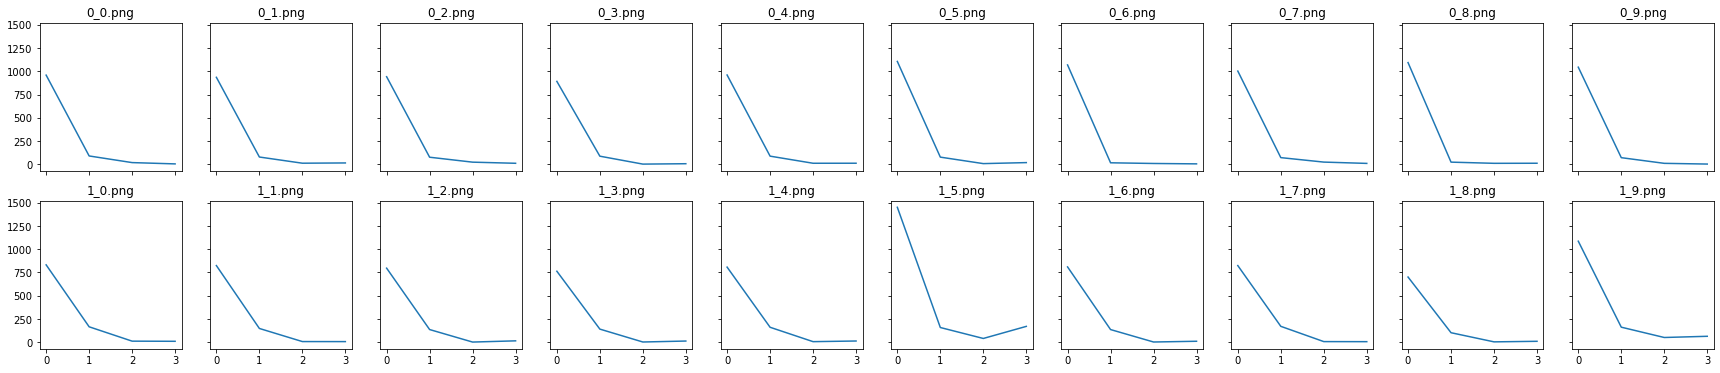

In [7]:
fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 6), sharex=True, sharey=True)
for ax, im, nm in zip(axes[0], contours_zeros_im, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]))
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], contours_ones_im, ones_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]))
    ax.set_title(nm)

As you can see, the first desciptor is almost the same for all the images (zeros and ones) apart from the intensity. And since the first descriptor is the only one affected by the translation, instead of normalizing and centering the contours, we decide to use the second and third fourier descriptors as our features.

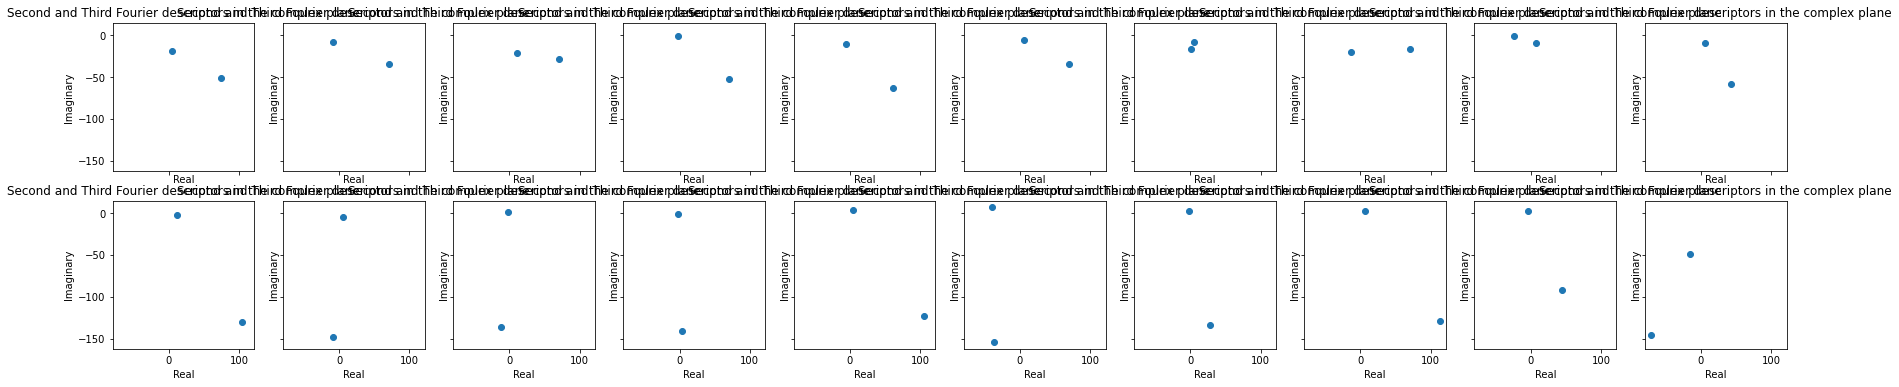

In [8]:
fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 6), sharex=True, sharey=True)
for ax, im, nm in zip(axes[0], contours_zeros_im, zeros_names):
    fourier = fourierDescriptor(im[0])[1:3]
    #real part
    x = [ele.real for ele in fourier]
    #imaginary part
    y = [ele.imag for ele in fourier]

    ax.scatter(x, y)
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_title('Second and Third Fourier descriptors in the complex plane')

for ax, im, nm in zip(axes[1], contours_ones_im, ones_names):
    fourier = fourierDescriptor(im[0])[1:3]
    #real part
    x = [ele.real for ele in fourier]
    #imaginary part
    y = [ele.imag for ele in fourier]

    ax.scatter(x, y)
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_title('Second and Third Fourier descriptors in the complex plane')

Next, we extract the norms of our second and third descriptors that we'll be using to scatter

In [9]:
zeros_second_norm = [abs(fourierDescriptor(im[0])[1]) for im in contours_zeros_im]
zeros_third_norm = [abs(fourierDescriptor(im[0])[2]) for im in contours_zeros_im]

ones_second_norm = [abs(fourierDescriptor(im[0])[1]) for im in contours_ones_im]
ones_third_norm = [abs(fourierDescriptor(im[0])[2]) for im in contours_ones_im]

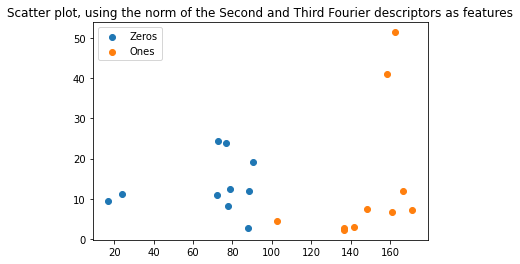

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(zeros_second_norm, zeros_third_norm, label="Zeros")
ax.scatter(ones_second_norm, ones_third_norm, label="Ones")
ax.legend()
ax.set_title("Scatter plot, using the norm of the Second and Third Fourier descriptors as features")
plt.show()

In [11]:
## this function is copied from https://github.com/scikit-learn/scikit-learn/blob/main/examples/neighbors/plot_classification.py
"""
================================
Nearest Neighbors Classification
================================
Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

def plot_decision_boundary(X, y, cmap_light, cmap_bold, h):

    n_neighbors = 5

#     h = 0.5  # step size in the mesh

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))
        plt.xlabel('First Fourier descriptor')
        plt.ylabel('Second Fourier descriptor')

    plt.show()


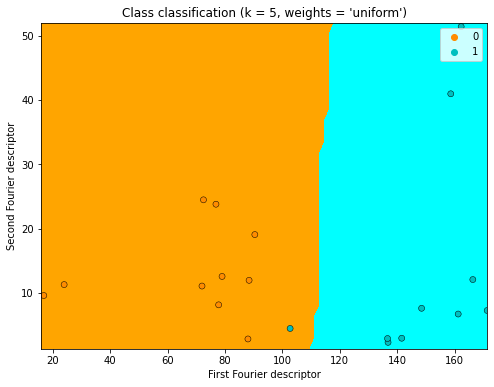

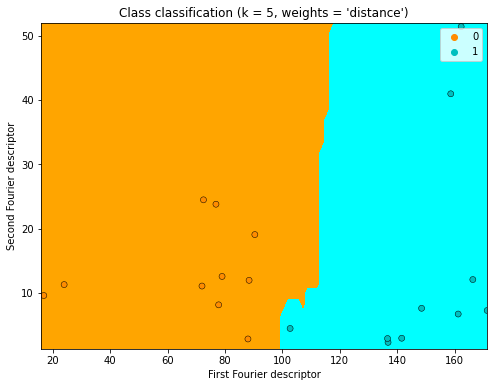

In [12]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'c']

X = np.column_stack((zeros_second_norm + ones_second_norm, zeros_third_norm + ones_third_norm))
y = np.array([0] * len(zeros_second_norm) + [1] * len(ones_second_norm))
h = (X.max() - X.min()) / 1e2

plot_decision_boundary(X, y, cmap_light, cmap_bold, h)

### Showing invariance to rotation, translation and scaling

##### 1. Invariance to rotation

In [13]:
## this function is extracted from https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point[0],point[1]

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [14]:
## rotate all contours by 10 radians
rotated_contours_zeros = []
rotated_contours_ones = []

for contour in contours_zeros_im:
    listed = []
    for point in contour[0]:
        qx,qy = rotate((14,14), point[0],10)
        listed.append([[qx,qy]])
    rotated_contours_zeros.append([np.array(listed, dtype=np.int32)])

for contour in contours_ones_im:
    listed = []
    for point in contour[0]:
        qx,qy = rotate((14,14), point[0],10)
        listed.append([[qx,qy]])
    rotated_contours_ones.append([np.array(listed, dtype=np.int32)])

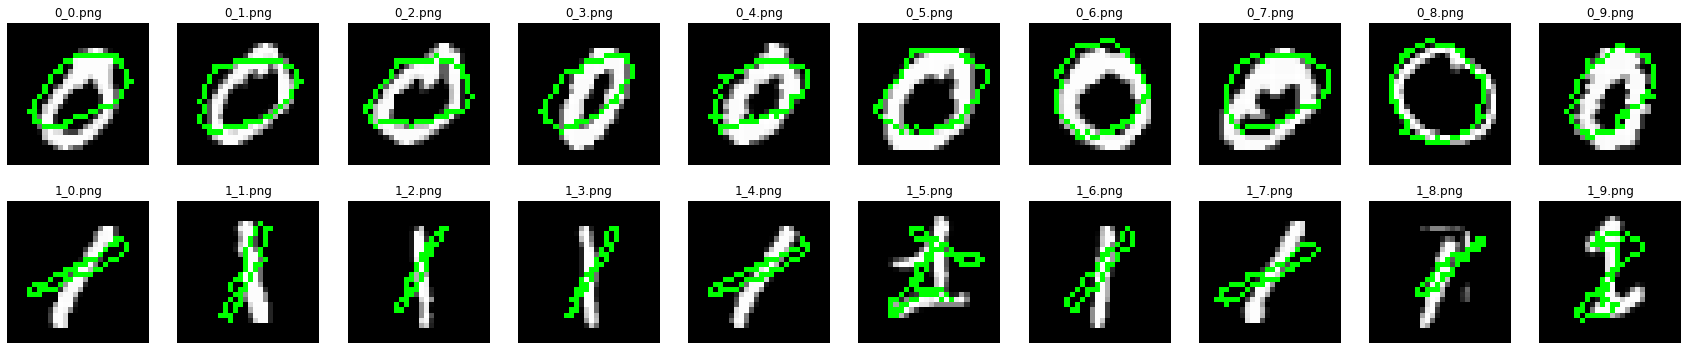

In [15]:
## draw rotated contours

draw_contours_zeros = []
draw_contours_ones = []
for i in range(len(zeros_im)):
    draw_contours_zeros.append(cv2.drawContours(cv2.cvtColor(zeros_im[i], cv2.COLOR_GRAY2BGR), rotated_contours_zeros[i], 0, (0,255,0), 1))
    draw_contours_ones.append(cv2.drawContours(cv2.cvtColor(ones_im[i], cv2.COLOR_GRAY2BGR), rotated_contours_ones[i], 0, (0,255,0), 1))


fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 6))
for ax, im, nm in zip(axes[0], draw_contours_zeros, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], draw_contours_ones, ones_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

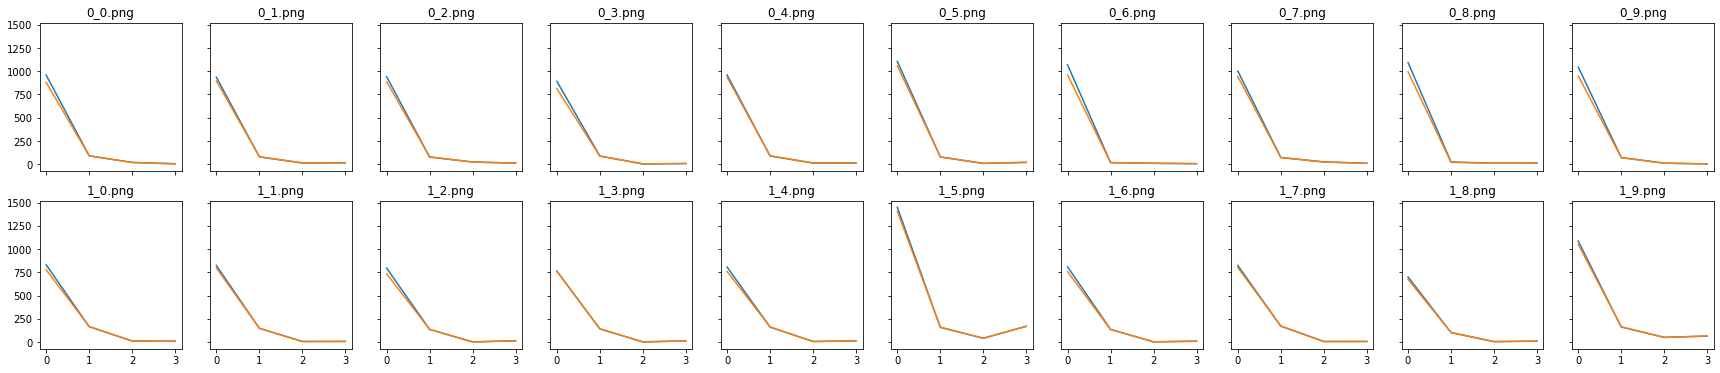

In [16]:
fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 6), sharex=True, sharey=True)
for ax, im, nm in zip(axes[0], contours_zeros_im, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]))
    ax.set_title(nm)

for ax, im, nm in zip(axes[0], rotated_contours_zeros, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]))
    ax.set_title(nm)
    
for ax, im, nm in zip(axes[1], contours_ones_im, ones_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]))
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], rotated_contours_ones, ones_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]))
    ax.set_title(nm)  

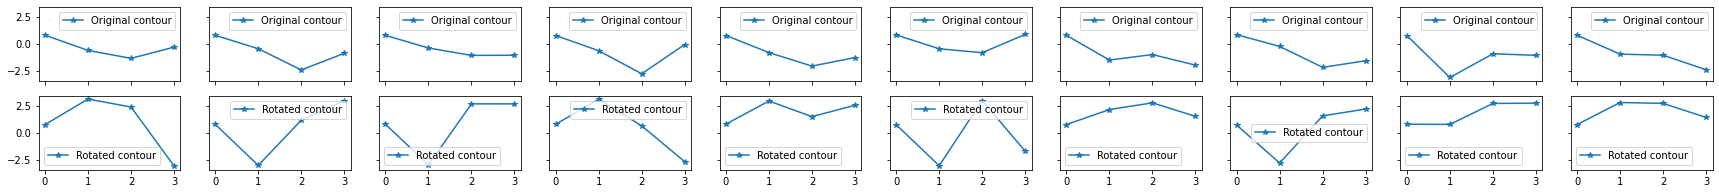

In [17]:
# plot the phases
fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 3), sharex=True, sharey=True)
for ax, original_contour,rotated_contour, nm in zip(axes[0], contours_zeros_im,rotated_contours_zeros, zeros_names):
    ax.plot(np.angle(fourierDescriptor(original_contour[0])[:4]), label='Original contour', marker='*')
    ax.legend()
for ax, original_contour,rotated_contour, nm in zip(axes[1], contours_zeros_im,rotated_contours_zeros, zeros_names):
    ax.plot(np.angle(fourierDescriptor(rotated_contour[0])[:4]), label='Rotated contour', marker='*')
    ax.legend()

We can see that after rotating the contours with an angle 10radians, we see that only the phase of the Fourier Descriptors is changed and the amplitude remained the same (as seen in class).
Therefore, the Fourier descriptors are invariant to rotation, thus the features are unaffected.

##### 2. Invariance to translation

In [18]:
# We will translate the contours by a vector (3,3)
translated_contours_zeros = [[contour_zero[0] + 3] for contour_zero in contours_zeros_im]
translated_contours_ones = [[contour_one[0] + 3] for contour_one in contours_ones_im]

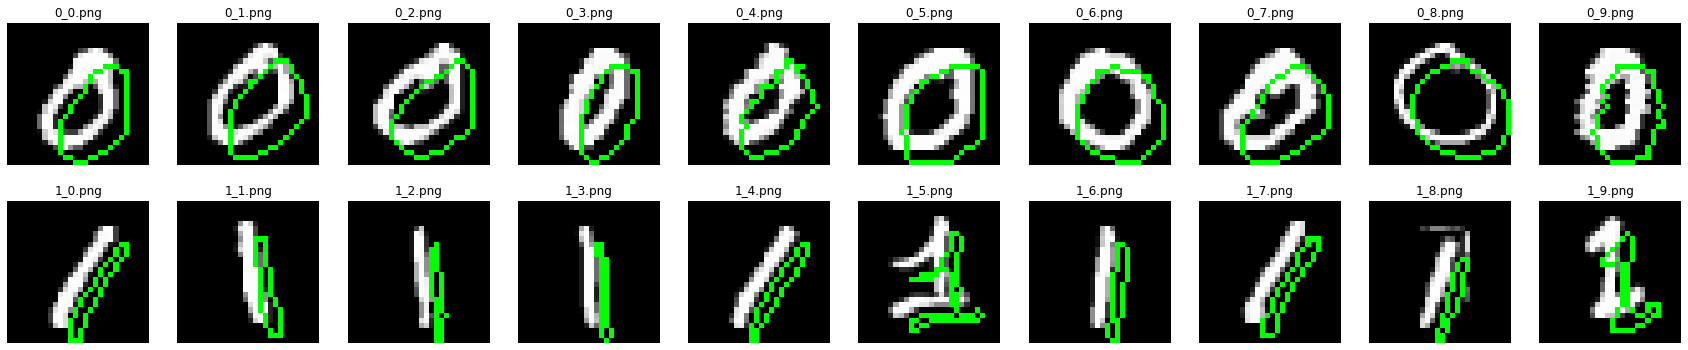

In [19]:
# Draw translated contour

draw_contours_zeros = []
draw_contours_ones = []
for i in range(len(zeros_im)):
    draw_contours_zeros.append(cv2.drawContours(cv2.cvtColor(zeros_im[i], cv2.COLOR_GRAY2BGR), translated_contours_zeros[i], 0, (0,255,0), 1))
    draw_contours_ones.append(cv2.drawContours(cv2.cvtColor(ones_im[i], cv2.COLOR_GRAY2BGR), translated_contours_ones[i], 0, (0,255,0), 1))


fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 6))
for ax, im, nm in zip(axes[0], draw_contours_zeros, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], draw_contours_ones, ones_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

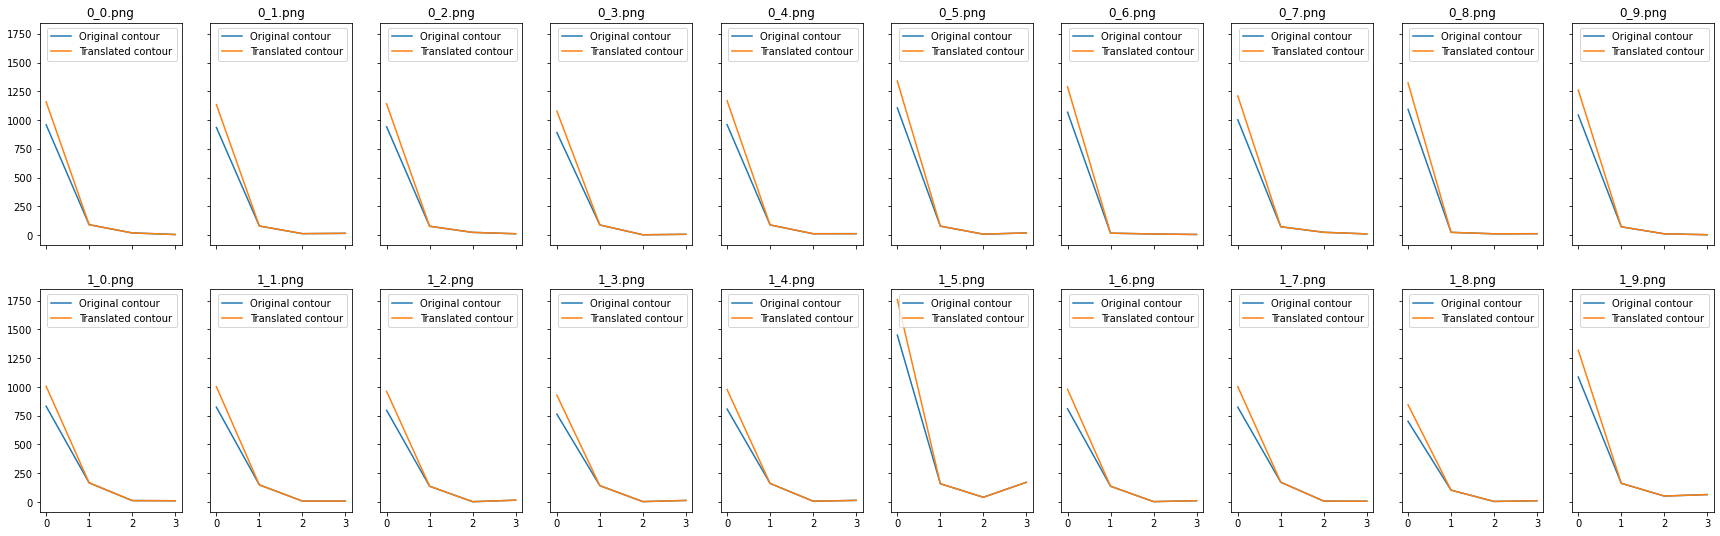

In [20]:
fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 9), sharex=True, sharey=True)
for ax, im, nm in zip(axes[0], contours_zeros_im, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]), label='Original contour')
    ax.set_title(nm)
    ax.legend()

for ax, im, nm in zip(axes[0], translated_contours_zeros, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]), label='Translated contour')
    ax.set_title(nm)
    ax.legend()
    
for ax, im, nm in zip(axes[1], contours_ones_im, ones_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]), label='Original contour')
    ax.set_title(nm)
    ax.legend()

for ax, im, nm in zip(axes[1], translated_contours_ones, ones_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]), label='Translated contour')
    ax.set_title(nm)
    ax.legend()

As seen in course, the translation only affects the first Fourier descriptor, the others remain unaffected. Thus the chosen one (ie: the second and third fourier descriptors) are not affected and are invariant to translation.
Below we will plot the phases, but we already know that they will not be affected because of our translation vector (3,3) that will keep all the phases unchanged.

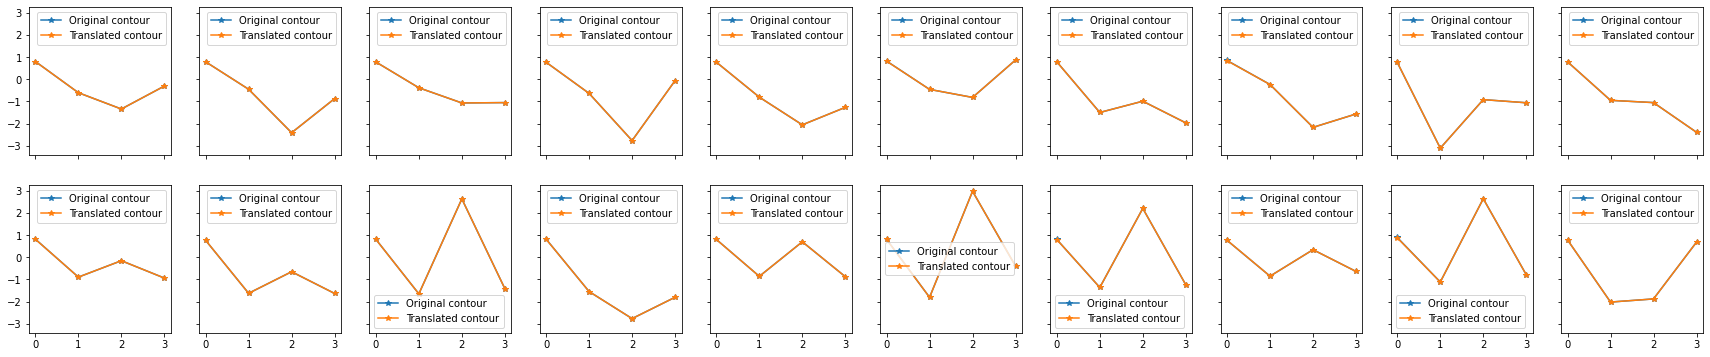

In [21]:
# plot the phases
fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 6),  sharex=True, sharey=True)
for ax, im1,im2, nm in zip(axes[0], contours_zeros_im,translated_contours_zeros,zeros_names):
    ax.plot(np.angle(fourierDescriptor(im1[0])[:4]), label='Original contour', marker='*')
    ax.plot(np.angle(fourierDescriptor(im2[0])[:4]), label='Translated contour', marker='*')
    ax.legend()
    
for ax, im1,im2, nm in zip(axes[1], contours_ones_im,translated_contours_ones, ones_names):
    ax.plot(np.angle(fourierDescriptor(im1[0])[:4]), label='Original contour', marker='*')
    ax.plot(np.angle(fourierDescriptor(im2[0])[:4]), label='Translated contour', marker='*')    
    ax.legend()

##### 3. Invariance to scaling

the following scale_contour function was taken from https://medium.com/analytics-vidhya/tutorial-how-to-scale-and-rotate-contours-in-opencv-using-python-f48be59c35a2

In [22]:
def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

In [23]:
# We will scale the contours by a factor 1.2
scaled_contours_zeros = [[scale_contour(contour_zero[0],1.3)] for contour_zero in contours_zeros_im]
scaled_contours_ones = [[scale_contour(contour_one[0],1.3)] for contour_one in contours_ones_im]

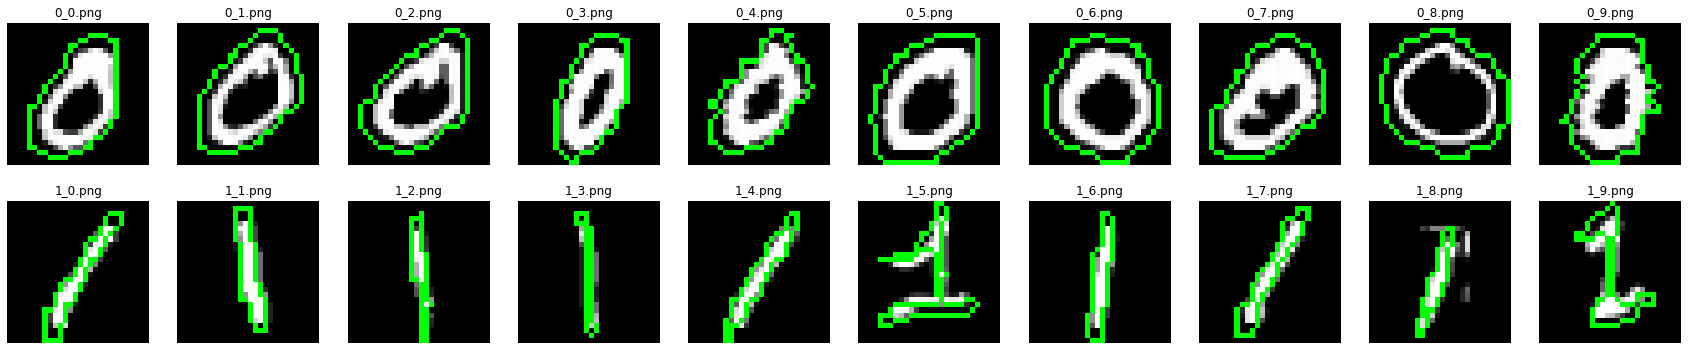

In [24]:
# Draw translated contour

draw_contours_zeros = []
draw_contours_ones = []
for i in range(len(zeros_im)):
    draw_contours_zeros.append(cv2.drawContours(cv2.cvtColor(zeros_im[i], cv2.COLOR_GRAY2BGR), scaled_contours_zeros[i], 0, (0,255,0), 1))
    draw_contours_ones.append(cv2.drawContours(cv2.cvtColor(ones_im[i], cv2.COLOR_GRAY2BGR), scaled_contours_ones[i], 0, (0,255,0), 1))


fig, axes = plt.subplots(2, len(zeros_im), figsize=(30, 6))
for ax, im, nm in zip(axes[0], draw_contours_zeros, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], draw_contours_ones, ones_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

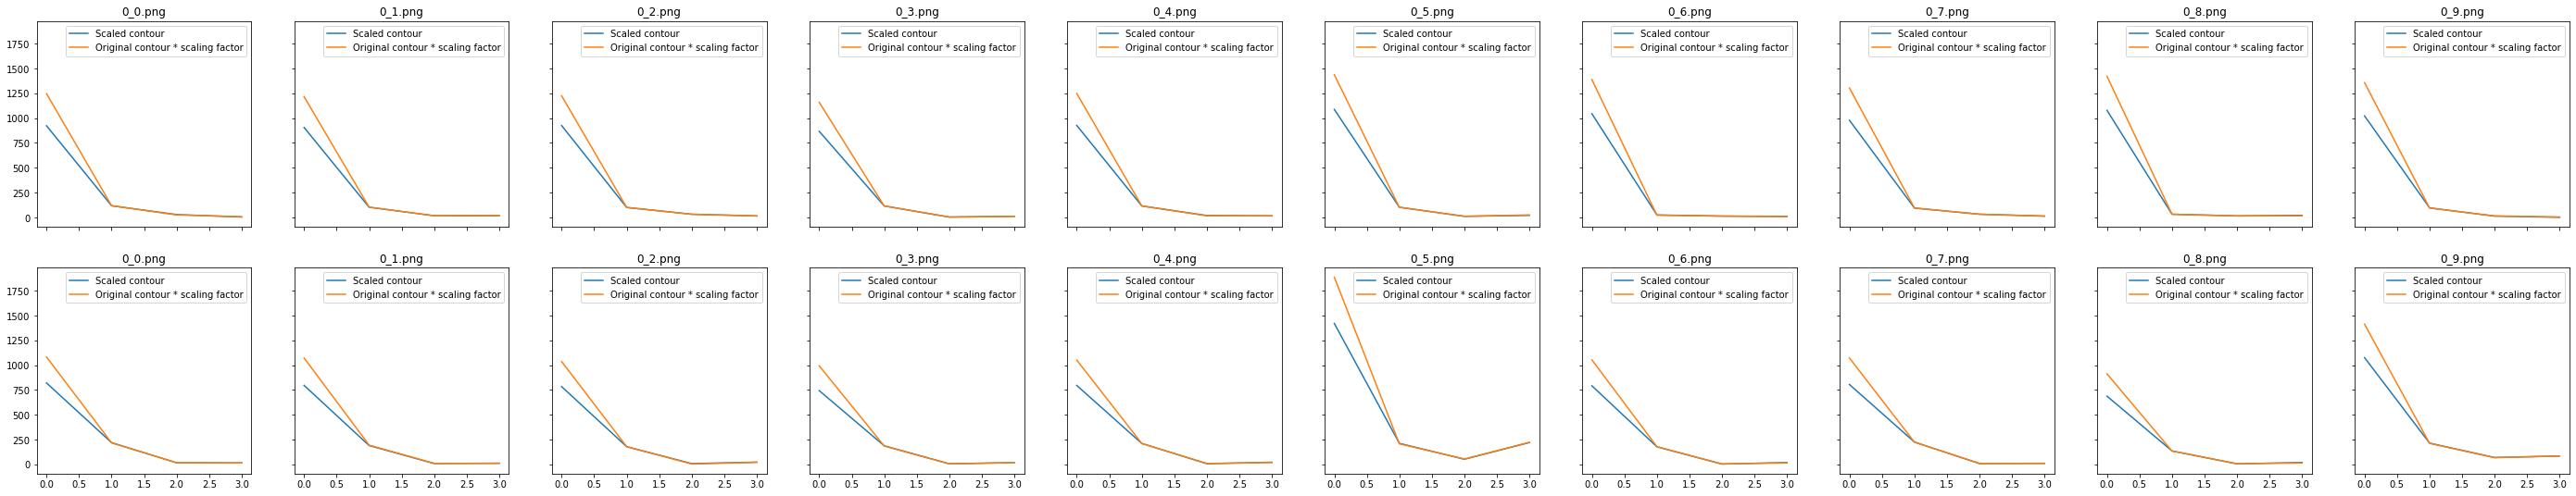

In [25]:
fig, axes = plt.subplots(2, len(zeros_im), figsize=(49, 9), sharex=True, sharey=True)

for ax, im, nm in zip(axes[0], scaled_contours_zeros, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]), label= 'Scaled contour')
    ax.set_title(nm)
    ax.legend()
    
for ax, im, nm in zip(axes[0], contours_zeros_im, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])*1.3)[:4], label= "Original contour * scaling factor")
    ax.set_title(nm)
    ax.legend()


for ax, im, nm in zip(axes[1], scaled_contours_ones, ones_names):
    ax.plot(abs(fourierDescriptor(im[0])[:4]), label= 'Scaled contour')
    ax.set_title(nm)
    ax.legend()

for ax, im, nm in zip(axes[1], contours_ones_im, zeros_names):
    ax.plot(abs(fourierDescriptor(im[0])*1.3)[:4], label= "Original contour * scaling factor")
    ax.set_title(nm)
    ax.legend()

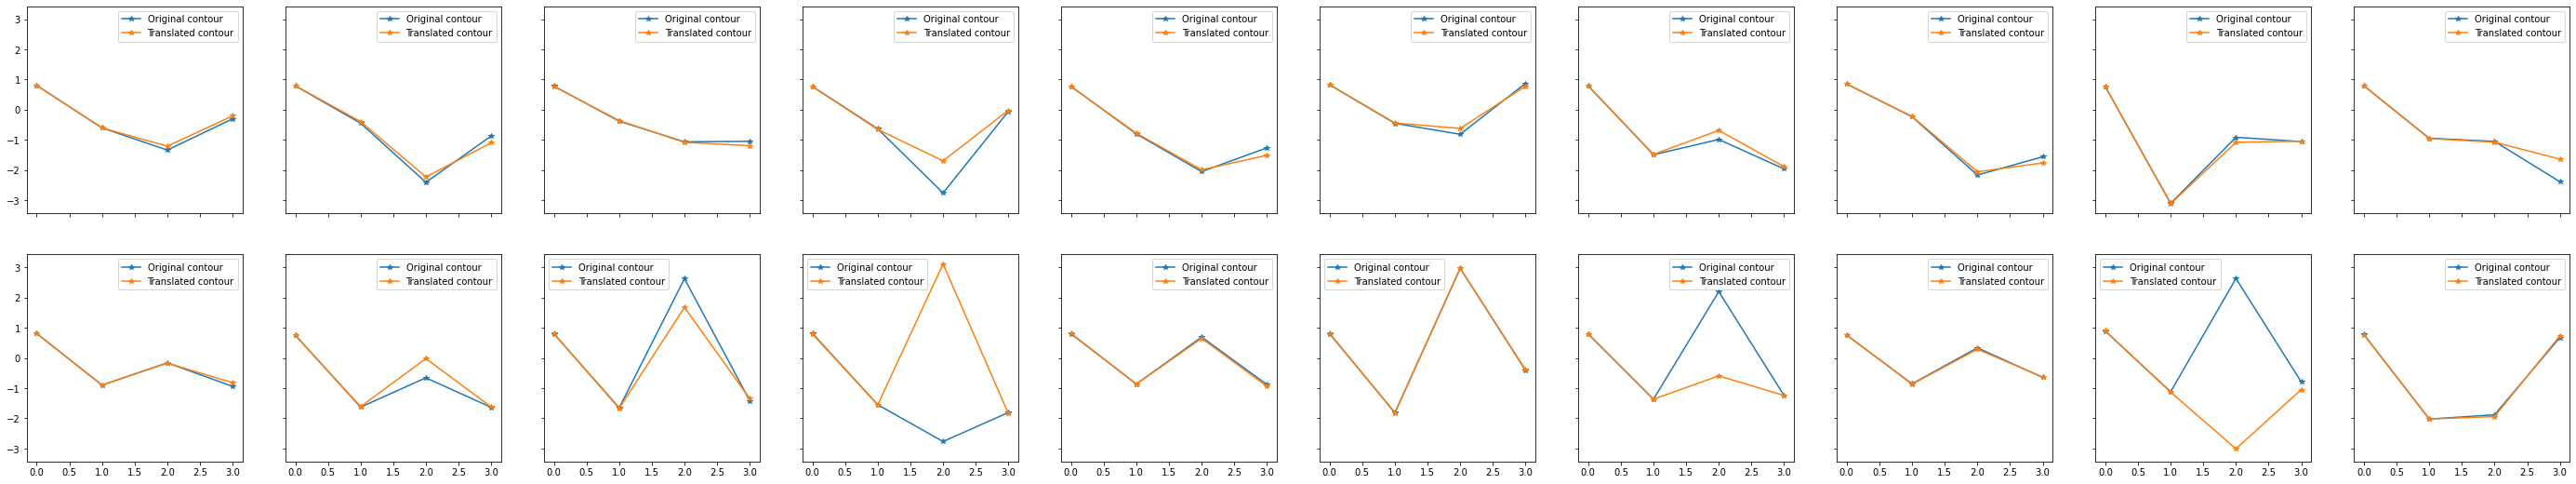

In [26]:
# plot the phases
fig, axes = plt.subplots(2, len(zeros_im), figsize=(49, 9),  sharex=True, sharey=True)
for ax, im1,im2, nm in zip(axes[0], contours_zeros_im,scaled_contours_zeros,zeros_names):
    ax.plot(np.angle(fourierDescriptor(im1[0])[:4]), label='Original contour', marker='*')
    ax.plot(np.angle(fourierDescriptor(im2[0])[:4]), label='Translated contour', marker='*')
    ax.legend()
    
for ax, im1,im2, nm in zip(axes[1], contours_ones_im,scaled_contours_ones, ones_names):
    ax.plot(np.angle(fourierDescriptor(im1[0])[:4]), label='Original contour', marker='*')
    ax.plot(np.angle(fourierDescriptor(im2[0])[:4]), label='Translated contour', marker='*')    
    ax.legend()

We can see from the plots above that scaling by a factor (in our case =1.3) multiplies the descriptors by this same factor. Thus, ratios between each descriptor stays unchanged.

## 1.3 Additional method (5 pts)

### Axes of inertia (PCA)

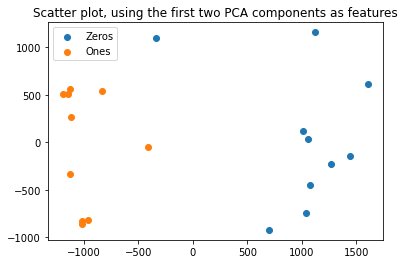

In [27]:
from sklearn.decomposition import PCA
# Perform pca on the input images

images = np.concatenate((zeros_im, ones_im)).reshape(20, -1)
reduced = PCA(n_components=2).fit_transform(images)

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(reduced[0:10, 0], reduced[0:10, 1], label="Zeros")
ax.scatter(reduced[10:, 0], reduced[10:, 1], label="Ones")
ax.legend()
ax.set_title("Scatter plot, using the first two PCA components as features")
plt.show()

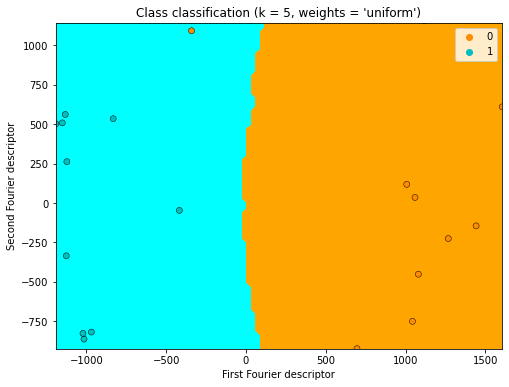

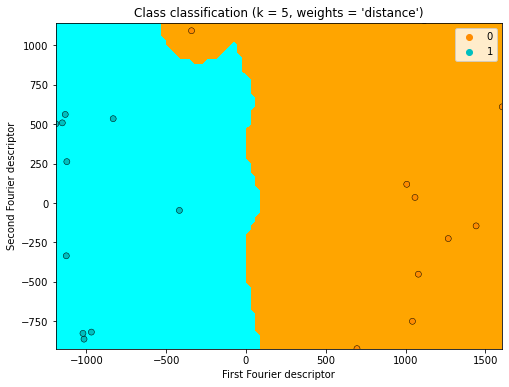

In [28]:
X = np.column_stack((reduced[:, 0], reduced[:, 1]))
y = np.array([0] * len(zeros_second_norm) + [1] * len(ones_second_norm))
h = (X.max() - X.min()) / 1e2
plot_decision_boundary(X, y, cmap_light, cmap_bold, h)

---
## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

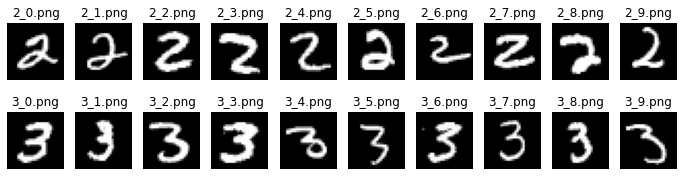

In [29]:
#  Load twos and threes
twos_im, twos_names = load(data_part2, digit='2')
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Fourier descriptors - 4 digits (10 pts)

In [30]:
# Add your implementation and discussion
twos_second_norm = []
twos_third_norm = []
threes_second_norm = []
threes_third_norm = []
twos_norm = []
threes_norm = []

for img in twos_im:
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contour_points_fft = fourierDescriptor(contours[0])[0:5]
    twos_second_norm.append(abs(contour_points_fft[1]))
    twos_third_norm.append(abs(contour_points_fft[2]))
    twos_norm.append(list(abs(contour_points_fft)[1:3]))


for img in threes_im:
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contour_points_fft = fourierDescriptor(contours[0])[0:5]
    threes_second_norm.append(abs(contour_points_fft[1]))
    threes_third_norm.append(abs(contour_points_fft[2]))
    threes_norm.append(list(abs(contour_points_fft)[1:3]))

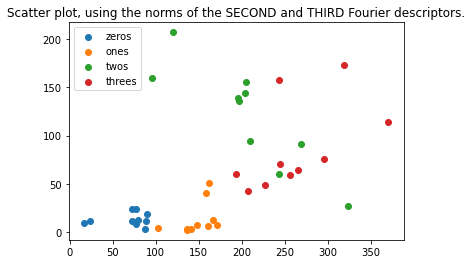

In [31]:
# plot using only norm of first and second fourier descriptors.
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(zeros_second_norm, zeros_third_norm, label="zeros")
ax.scatter(ones_second_norm, ones_third_norm, label="ones")
ax.scatter(twos_second_norm, twos_third_norm, label="twos")
ax.scatter(threes_second_norm, threes_third_norm, label="threes")
ax.legend()
ax.set_title("Scatter plot, using the norms of the SECOND and THIRD Fourier descriptors.")
plt.show()

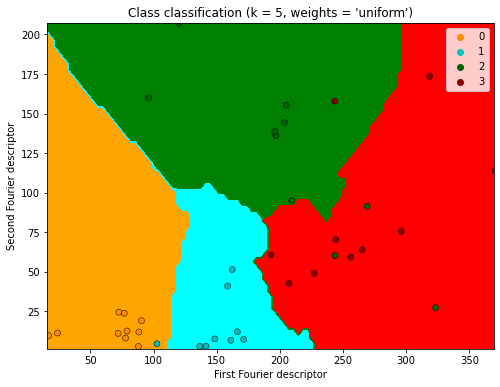

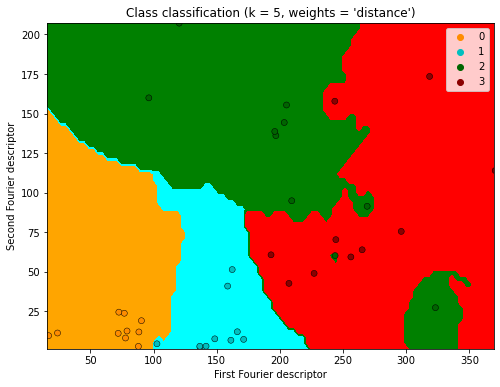

In [32]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'green', 'red'])
cmap_bold = ['darkorange', 'c', 'darkgreen', 'darkred']

X = np.column_stack((zeros_second_norm + ones_second_norm + twos_second_norm + threes_second_norm,
                     zeros_third_norm + ones_third_norm  + twos_third_norm + threes_third_norm))

y = np.array([0] * len(zeros_second_norm) + [1] * len(ones_second_norm) + [2] * len(twos_second_norm) + [3] * len(threes_second_norm))
h = (X.max() - X.min()) / 1e2

plot_decision_boundary(X, y, cmap_light, cmap_bold, h)

We can observe it is much harder to draw the decision boundaries with 4 classes especially with for classes corresponding to 2 and 3 while using only 2 features from the fourier descriptors.